<a href="https://colab.research.google.com/github/kimeunh3/Kaggle_Titinic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install missingno

In [47]:
import tensorflow as tf
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
train_file = 'csv/train.csv'
test_file = 'csv/test.csv'
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
print(train.columns)
train.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# 고유값 개수 확인
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [50]:
# 결측치를 포함한 고유값 개수 확인
train.nunique(dropna = False)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

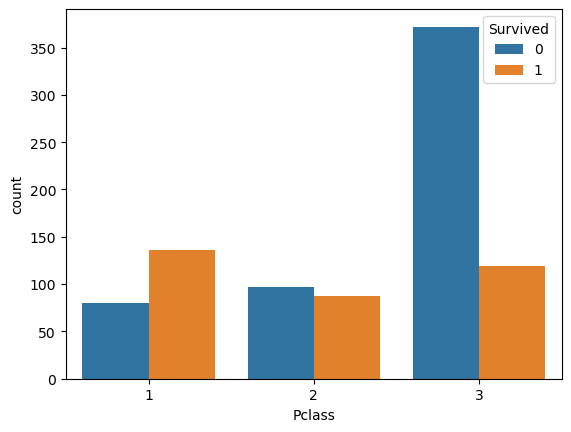

In [51]:
# 모든 데이터가 다른 고유값을 가지는 PassengerId와 Name을 제외한
# 고유값 개수가 10이하인 데이터들과 Survived의 상관여부 분석

# Pclass에 따른 생존여부
# 높은 클래스 탑승객들의 생존율이 더 높음을 알 수 있다. (상관성 O)
sns.countplot(data=train, x='Pclass', hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

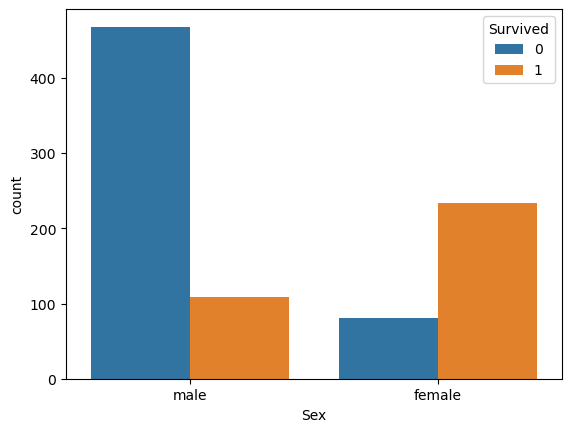

In [52]:
# Sex에 따른 생존여부
# 남성보다 여성의 생존율이 더 높음을 알 수 있다. (상관성 O)
sns.countplot(data=train, x='Sex', hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

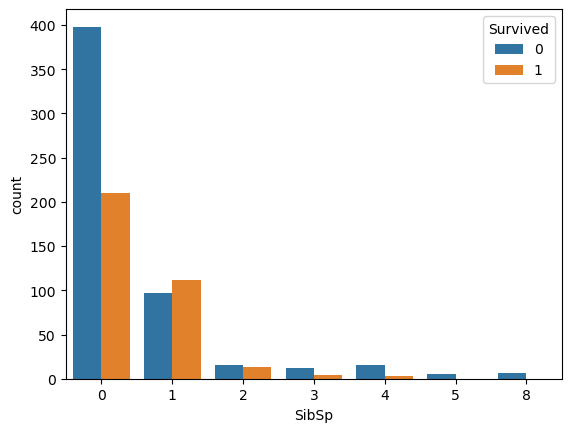

In [53]:
# SibSp에 따른 생존여부
# 형제가 많지 않은 승객들이 많았다는 것은 알 수 있으나
# 생존률과의 상관관계는 확신할 수 없다.
sns.countplot(data=train, x='SibSp', hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

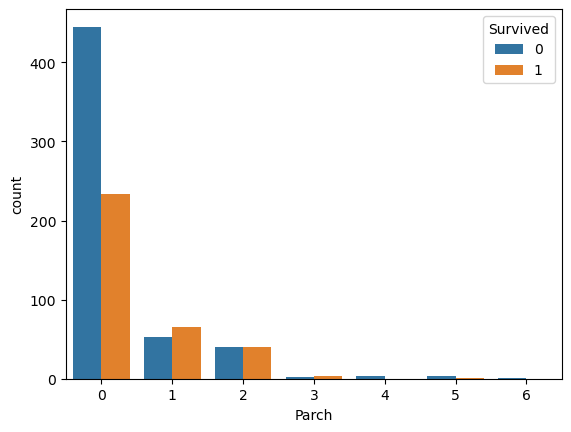

In [54]:
# Parch에 따른 생존여부
# SibSp와 같은 맥락
sns.countplot(data=train, x='Parch', hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

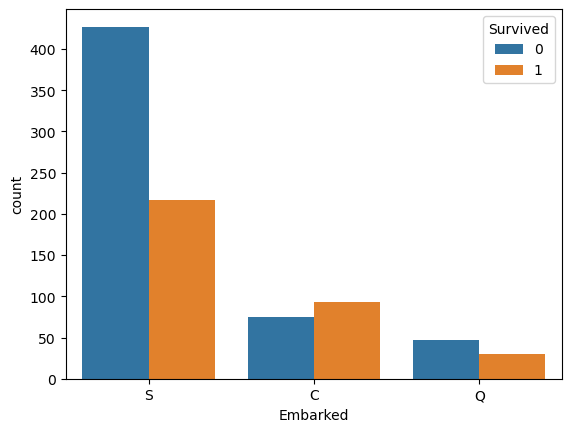

In [55]:
# Embarked에 따른 생존여부
# 많은 탑승객이 Southampton(S)에서 승선하였다는 것을 알 수 있으나
# 생존여부와 관련이 있는지는 확신할 수 없다.
sns.countplot(data=train, x='Embarked', hue='Survived')

In [56]:
# train 데이터와 test 데이터의 전처리를 동시에 하기 위해 두 데이터를 합쳐준다.
# test에는 Survived column이 없기 때문에 임의로 만들어 넣어주어야 한다.
# loc는 어디에 넣던지 상관은 없지만 데이터를 더 보기 쉽게하기 위해
# train과 동일한 위치에 넣어준다.
test.insert(loc=1, column='Survived', value=0)
test.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [57]:
# train 데이터의 바로 밑에 test 데이터를 넣어준 뒤 (axis=0일때는 행을 concat 1일때는 열을 concat)
# tail로 잘 들어갔는지 확인해준다.
data = pd.concat([train, test], axis=0)
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [58]:
# 결측치 확인
data.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [59]:
# 결측치 시각화
#msno.matrix(data)

In [60]:
# 결측치가 반 이상인 column을 삭제
# column 'Cabin'이 삭제됐음을 확인할 수 있다.
data = data.dropna(thresh=int(len(train)*0.5), axis=1)
#msno.matrix(data)

<Axes: xlabel='Age', ylabel='count'>

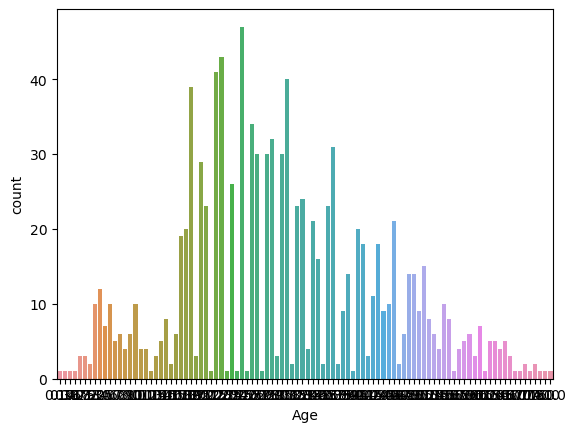

In [61]:
# Age의 결측치를 처리하기 위해 Age의 값의 분포를 알아본 결과
# 상당히 대칭적인 분포를 가지고 있기 때문에 평균값으로 결측치를 처리하려 한다.
sns.countplot(data=data, x='Age')

In [62]:
# Age의 평균값인 29.881137667304014로 결측치가 처리되었다.
age_mean = data['Age'].mean()
print(age_mean)
data['Age'] = data['Age'].fillna(age_mean)
#msno.matrix(data)

29.881137667304014


<Axes: xlabel='Fare', ylabel='count'>

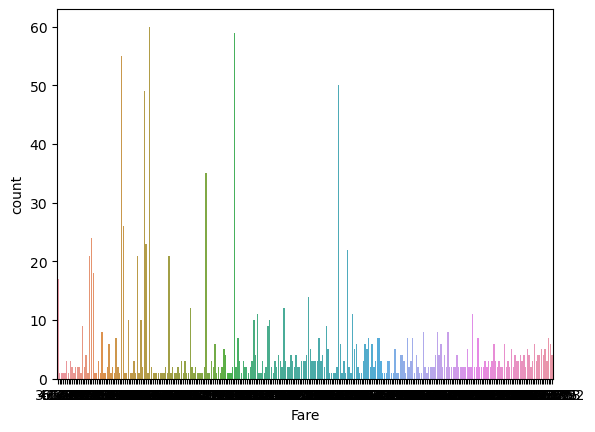

In [63]:
# Fare의 결측치를 처리하기 위해 Fare의 값의 분포를 알아본 결과
# 평균을 사용하기엔 이상치의 값이 꽤 있는걸로 보아 중앙값으로 결측치를 처리하려 한다.
sns.countplot(data=data, x='Fare')

In [64]:
# Fare의 중앙값인 14.4542로 결측치가 처리되었다.
fare_median = data['Fare'].median()
print(fare_median)
data['Fare'] = data['Fare'].fillna(fare_median)
#msno.matrix(data)

14.4542


<Axes: xlabel='Embarked', ylabel='count'>

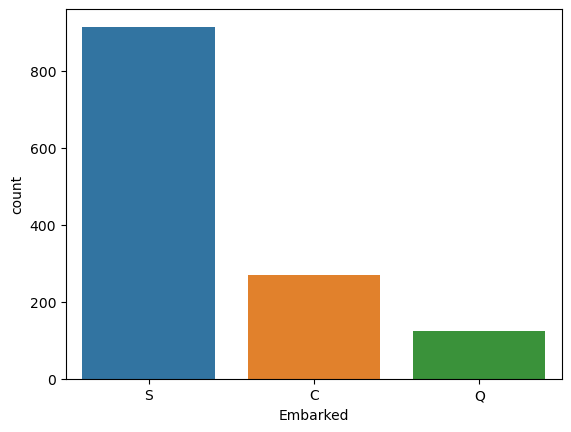

In [65]:
# Embarked의 결측치를 처리하기 위해 Embarked의 값의 분포를 알아본 결과
# 값의 분포가 S에 몰려있기 때문에 최빈값으로 결측치를 처리하려 한다.
sns.countplot(data=data, x='Embarked')

In [66]:
# Embarked의 결측치가 최빈값인 'S'로 처리되었다.
data['Embarked'] = data['Embarked'].fillna('S')
#msno.matrix(data)

In [67]:
# 범주형 데이터를 처리하기 전에, 
# PassengerId와 Name, Ticket은 생존여부와 관계가 없으므로 제외해준다.
# 대신 나중에 passenger_id는 output에 추가해주기 위해 미리 값을 저장해준다.
passenger_id = data[['PassengerId']].copy()
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [68]:
# 원핫인코딩
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [69]:
# 데이터 전처리를 끝낸 뒤 train과 test를 다시 나눠준다.
train, test = data[:len(train)], data[len(train):]
print(train.shape)
print(test.shape)
test.tail()

(891, 11)
(418, 11)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
413,0,3,29.881138,0,0,8.0500,False,True,False,False,True
414,0,1,39.000000,0,0,108.9000,True,False,True,False,False
415,0,3,38.500000,0,0,7.2500,False,True,False,False,True
416,0,3,29.881138,0,0,8.0500,False,True,False,False,True
417,0,3,29.881138,1,1,22.3583,False,True,True,False,False


In [70]:
# 독립, 종속변수 분리
print(train.columns)
trainX = train[[ x for x in train.columns if 'Survived' not in x ]]
trainY = train[['Survived']]
print(trainX.shape, trainY.shape)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
(891, 10) (891, 1)


In [71]:
testX = test[[ x for x in test.columns if 'Survived' not in x ]]
testY = test[['Survived']]

In [72]:
# 모델 구조 만들기
X = tf.keras.layers.Input(shape=[10])
H = tf.keras.layers.Dense(20, activation='swish')(X)
H = tf.keras.layers.Dense(20, activation='swish')(H)
H = tf.keras.layers.Dense(20, activation='swish')(H)
H = tf.keras.layers.Dense(20, activation='swish')(H)
H = tf.keras.layers.Dense(20, activation='swish')(H)
Y = tf.keras.layers.Dense(1, activation='sigmoid')(H)



In [73]:
model = tf.keras.models.Model(X, Y)

In [74]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_12 (Dense)            (None, 20)                220       
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dense_15 (Dense)            (None, 20)                420       
                                                                 
 dense_16 (Dense)            (None, 20)                420       
                                                                 
 dense_17 (Dense)            (None, 1)                 21  

In [75]:
model.compile(loss='binary_crossentropy', metrics='accuracy')

trainX = trainX.astype('float32')
testX = testX.astype('float32')

In [76]:
# 데이터로 모델 학습시키기
# batch size 150으로 epochs 약 10,000 정도 진행 
# loss = 0.0857, accuracy = 0.9641
model.fit(trainX, trainY, epochs=100, batch_size=150, verbose=0)
#model.fit(trainX, trainY, epochs=10, batch_size=150)

In [79]:
# 6. 정확도 평가
test_loss, test_acc = model.evaluate(testX, testY)
print('테스트 정확도:', test_acc)

14/14 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.7201
테스트 정확도: 0.720095694065094


In [80]:

# After fitting, evaluate on the validation set
validation_loss, validation_accuracy = model.evaluate(trainX, trainY)

print(f'Validation Loss: {validation_loss:.4f}')
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')


28/28 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8114
Validation Loss: 0.4514
Validation Accuracy: 81.14%


In [81]:
# 전에 저장해준 PassengerId값을 test범위만큼 잘라내어 result에 넣어준다.
result = passenger_id[len(train):]
result.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [82]:
# 예측해준 값을 0 또는 1로 round 해준 뒤 result에 결과값을 넣어준다
testY = np.round(model.predict(testX))
testY = pd.DataFrame(testY, columns = ['Survived'], dtype = int)
result = pd.concat([result, testY], axis=1)
result = result.set_index('PassengerId')
result.head()

14/14 [==============================] - 0s 922us/step


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [83]:
# 결과값을 csv파일로 추출
result.to_csv("submission.csv", mode='w')